<a href="https://colab.research.google.com/github/nikhilbaddam/my-Gan-s-works/blob/main/GAN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load and preprocess the data
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0
X_train = np.expand_dims(X_train, axis=-1)

In [12]:
# Define generator and discriminator
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        Dense(128, activation="relu", input_dim=latent_dim),
        Dense(784, activation="sigmoid"),
        Reshape((28, 28))
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    return model

In [13]:
def compile_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return gan

In [14]:
def train(gan, generator, discriminator, epochs, batch_size, latent_dim):
    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise)
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        if epoch % sample_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")
            sample_images(generator, epoch)

In [19]:
def sample_images(generator, epoch, rows=5, cols=5):
    noise = np.random.normal(0, 1, (rows * cols, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
    cnt = 0
    for i in range(rows):
        for j in range(cols):
            axs[i,j].imshow(gen_imgs[cnt].reshape(28, 28), cmap='gray')  # Reshape the image
            axs[i,j].axis('off')
            cnt += 1
    plt.show()
    plt.close()


In [20]:
# Set parameters
latent_dim = 100
epochs = 20000
batch_size = 32
sample_interval = 1000

In [21]:
# Initialize and compile models
discriminator = build_discriminator()
generator = build_generator(latent_dim)
gan = compile_gan(generator, discriminator)

1/1 [==============================] - 0s 48ms/step
0 [D loss: 0.7404977381229401] [G loss: 1.166725754737854]
1/1 [==============================] - 0s 49ms/step


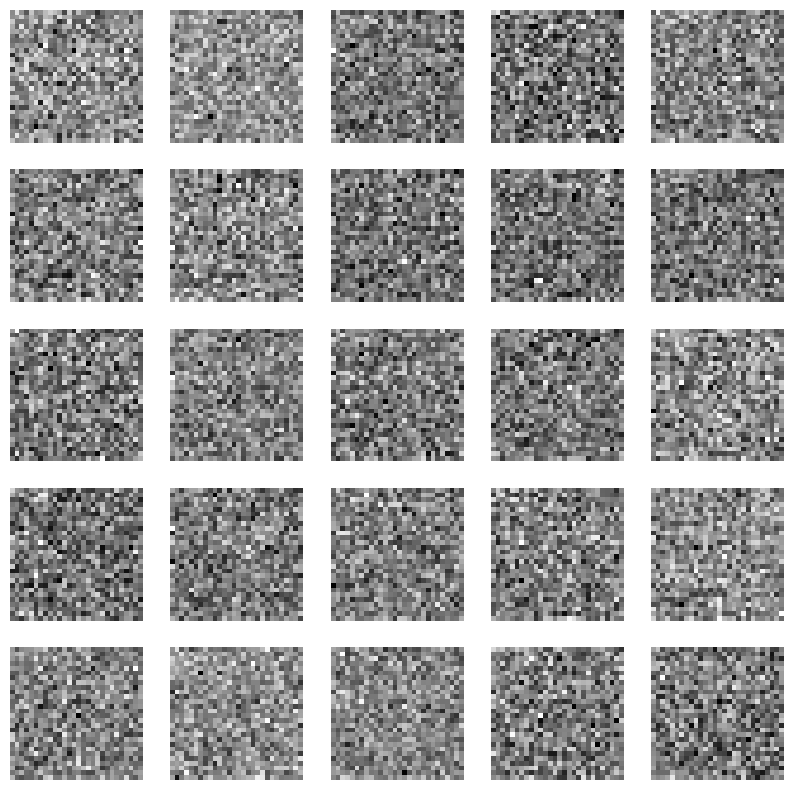

1/1 [==============================] - 0s 16ms/step
1000 [D loss: 0.30904945731163025] [G loss: 1.3158549070358276]
1/1 [==============================] - 0s 17ms/step


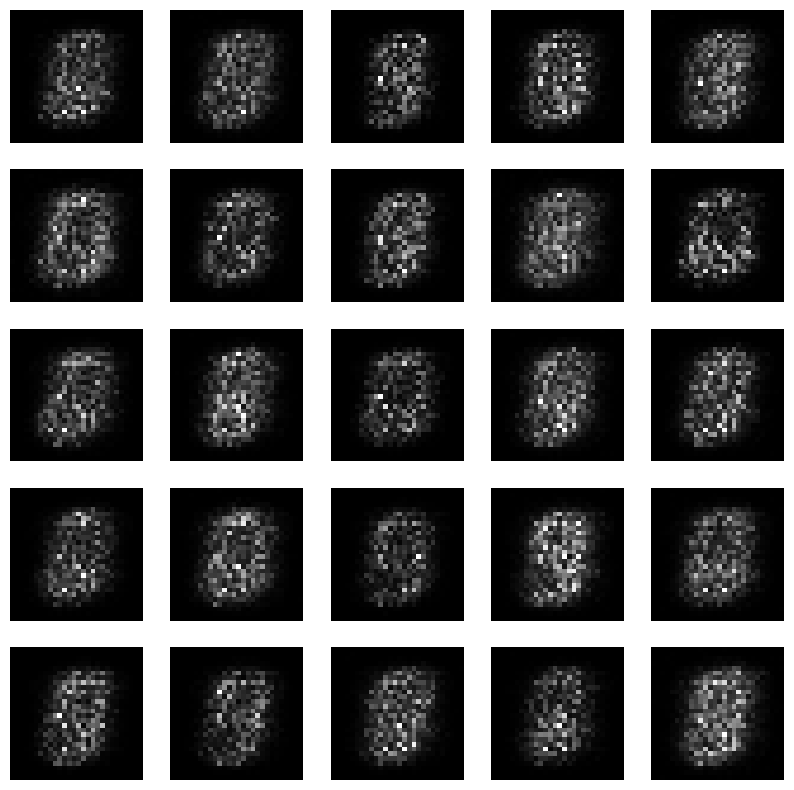

1/1 [==============================] - 0s 15ms/step
2000 [D loss: 0.12379172444343567] [G loss: 2.476796865463257]
1/1 [==============================] - 0s 23ms/step


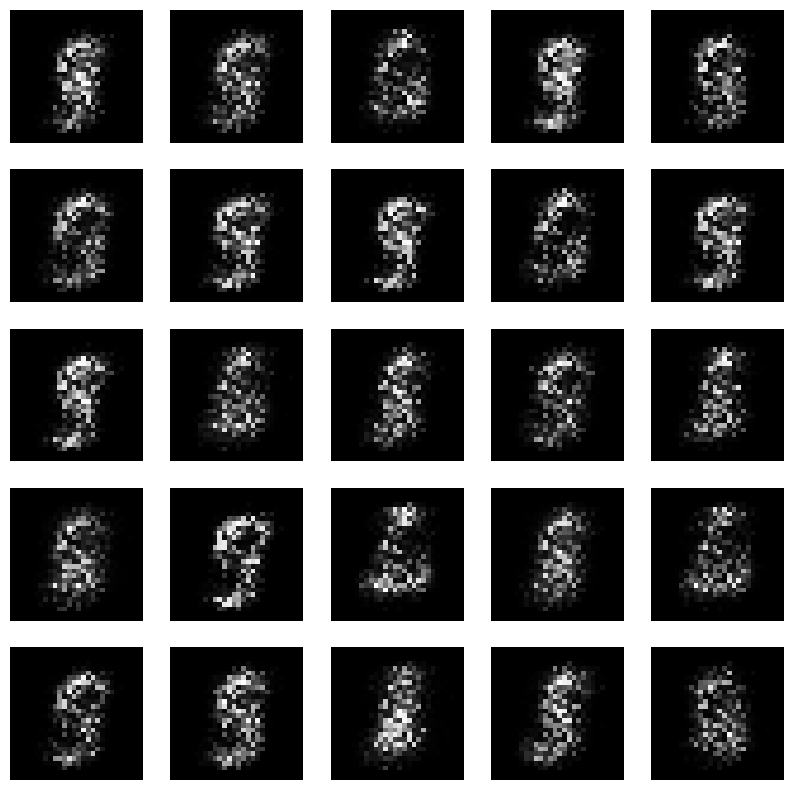

1/1 [==============================] - 0s 15ms/step
3000 [D loss: 0.14915697276592255] [G loss: 2.75108003616333]
1/1 [==============================] - 0s 19ms/step


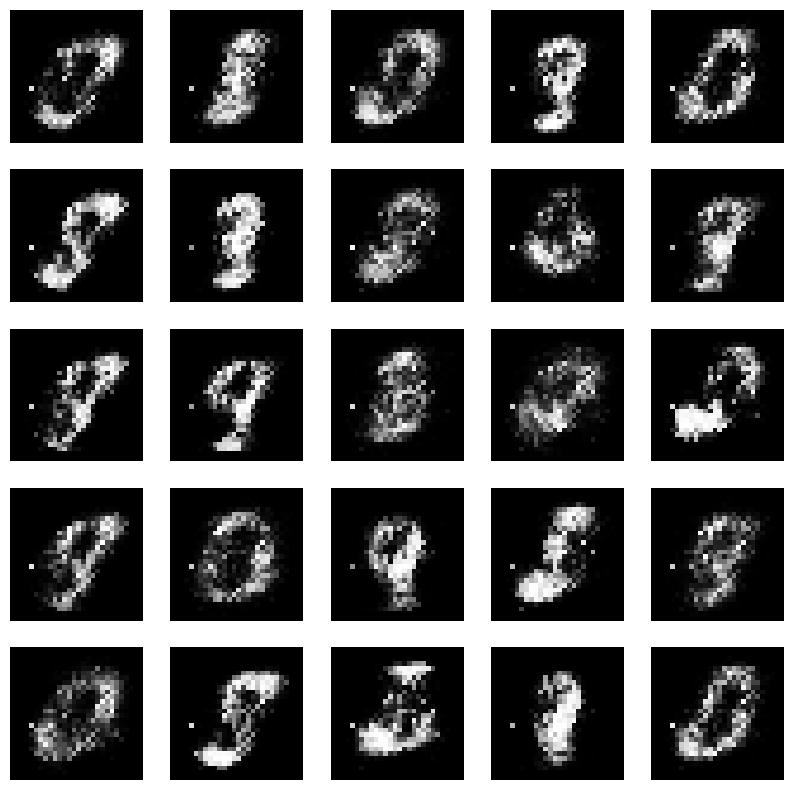

1/1 [==============================] - 0s 16ms/step
4000 [D loss: 0.2840172052383423] [G loss: 2.101318120956421]
1/1 [==============================] - 0s 17ms/step


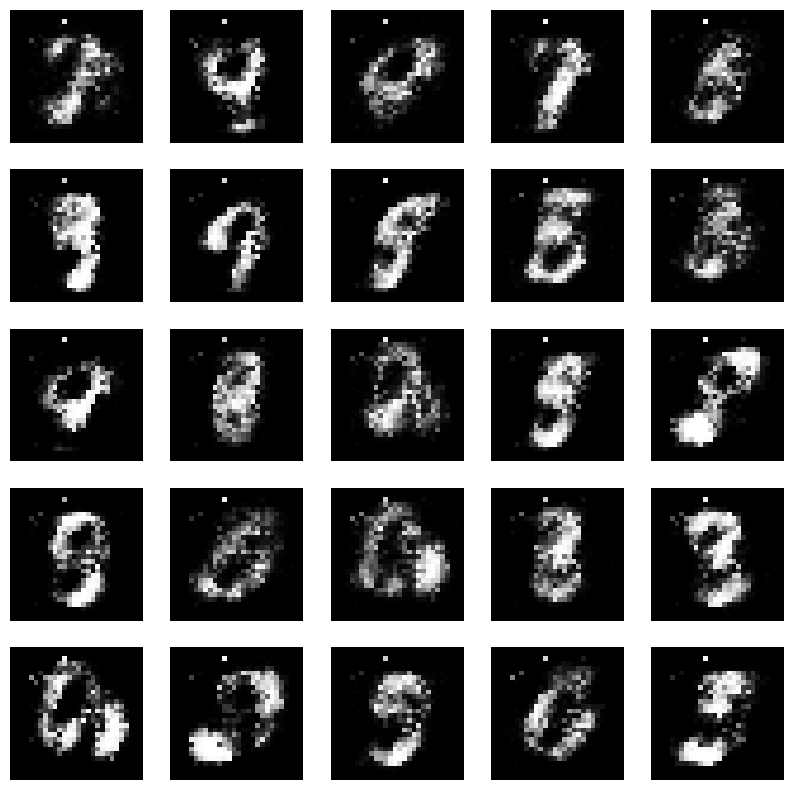

1/1 [==============================] - 0s 15ms/step
5000 [D loss: 0.26004181802272797] [G loss: 1.859562873840332]
1/1 [==============================] - 0s 19ms/step


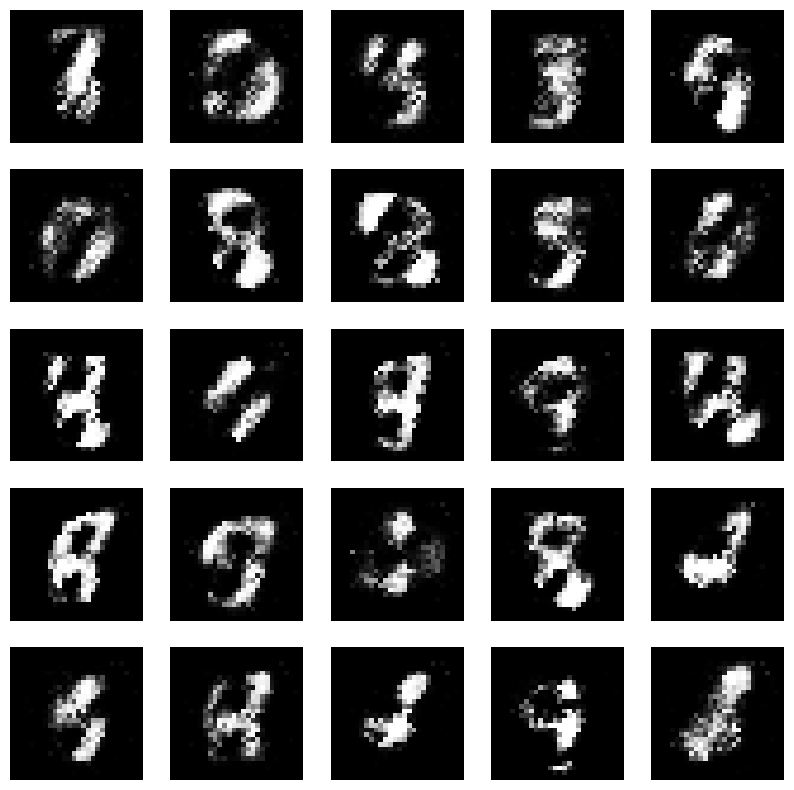

1/1 [==============================] - 0s 15ms/step
6000 [D loss: 0.3646562695503235] [G loss: 1.6232011318206787]
1/1 [==============================] - 0s 17ms/step


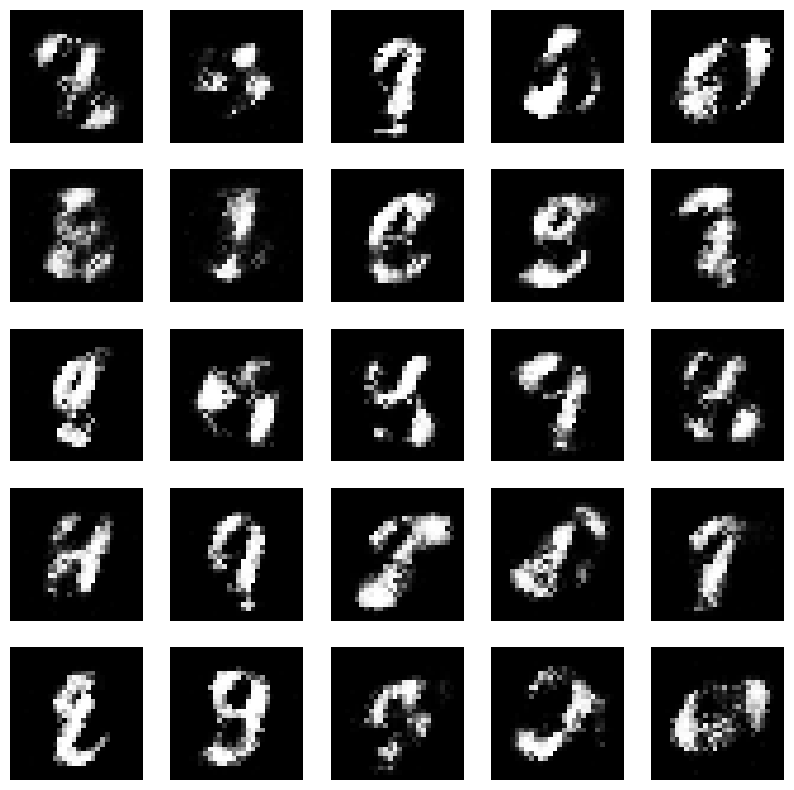

1/1 [==============================] - 0s 19ms/step
7000 [D loss: 0.27980146557092667] [G loss: 1.9082043170928955]
1/1 [==============================] - 0s 24ms/step


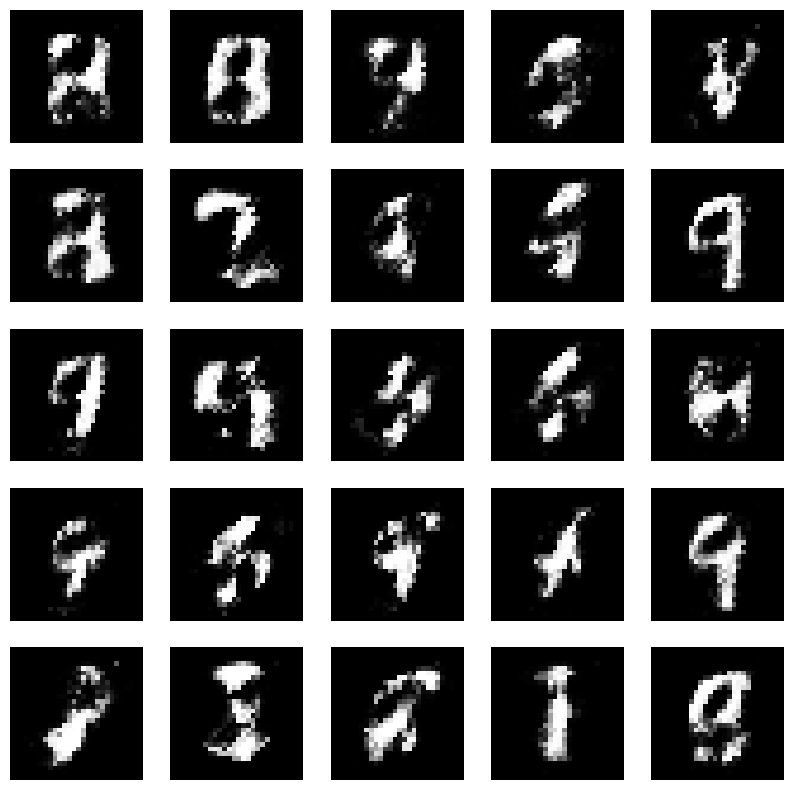

1/1 [==============================] - 0s 19ms/step
8000 [D loss: 0.3023102730512619] [G loss: 1.6186398267745972]
1/1 [==============================] - 0s 22ms/step


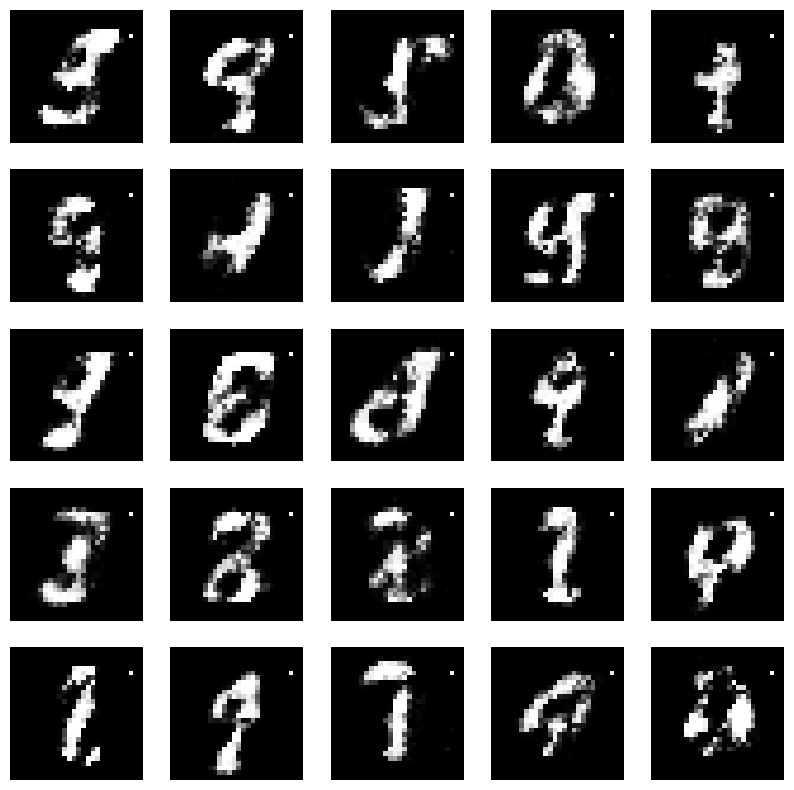

1/1 [==============================] - 0s 17ms/step
9000 [D loss: 0.3135256767272949] [G loss: 1.7995774745941162]
1/1 [==============================] - 0s 21ms/step


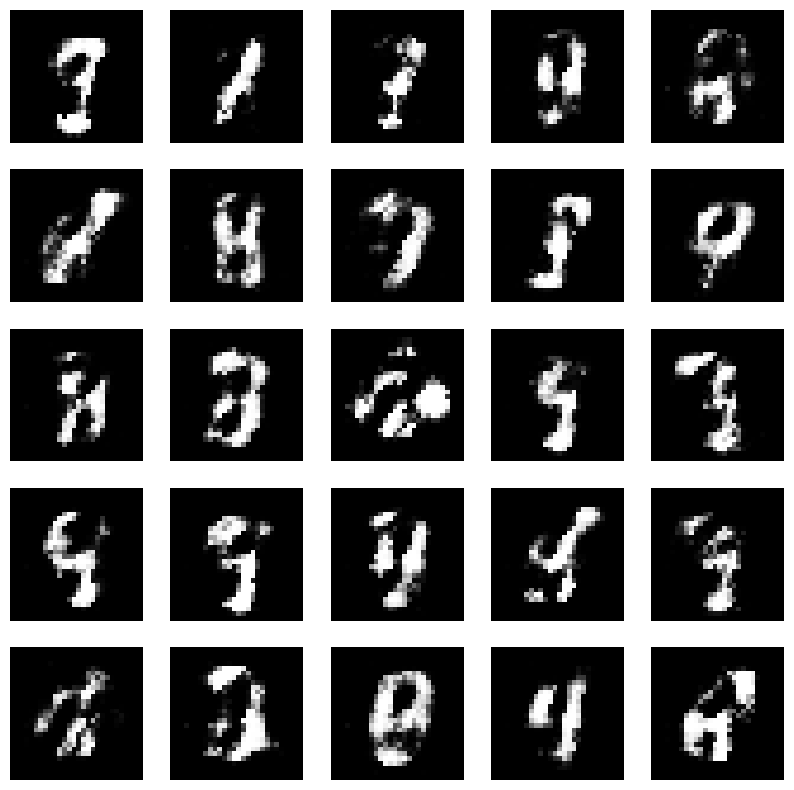

1/1 [==============================] - 0s 17ms/step
10000 [D loss: 0.3364177346229553] [G loss: 2.0220165252685547]
1/1 [==============================] - 0s 17ms/step


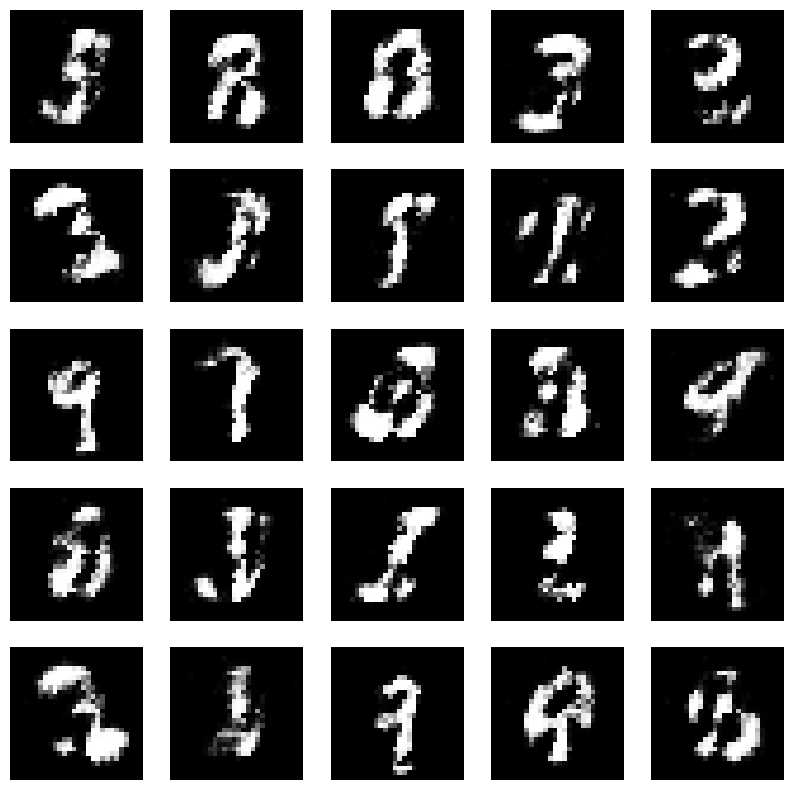

1/1 [==============================] - 0s 25ms/step
11000 [D loss: 0.33342525362968445] [G loss: 1.745927095413208]
1/1 [==============================] - 0s 27ms/step


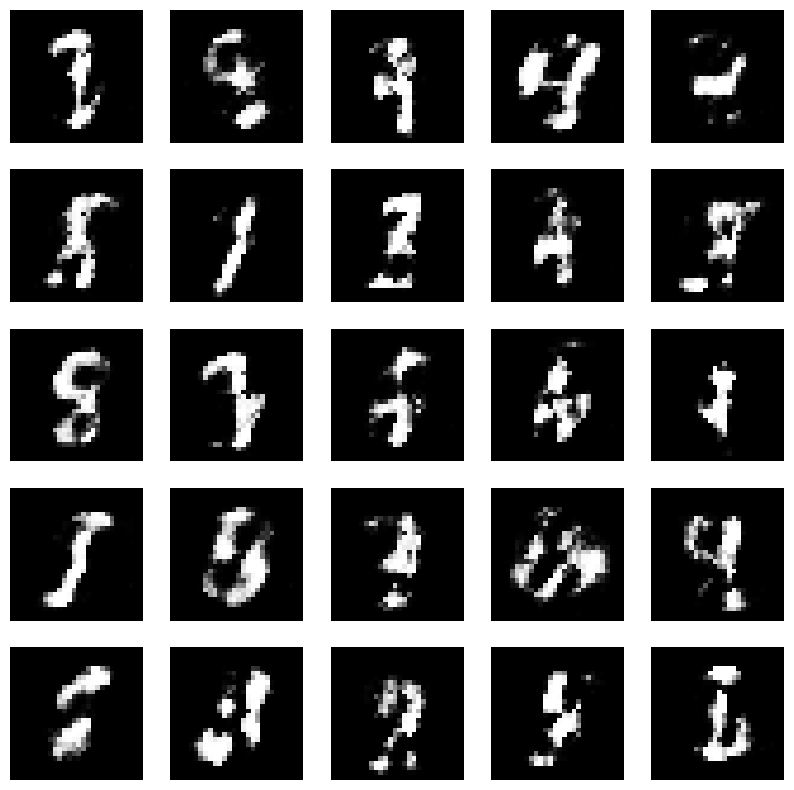

1/1 [==============================] - 0s 15ms/step
12000 [D loss: 0.3171188682317734] [G loss: 1.8682005405426025]
1/1 [==============================] - 0s 19ms/step


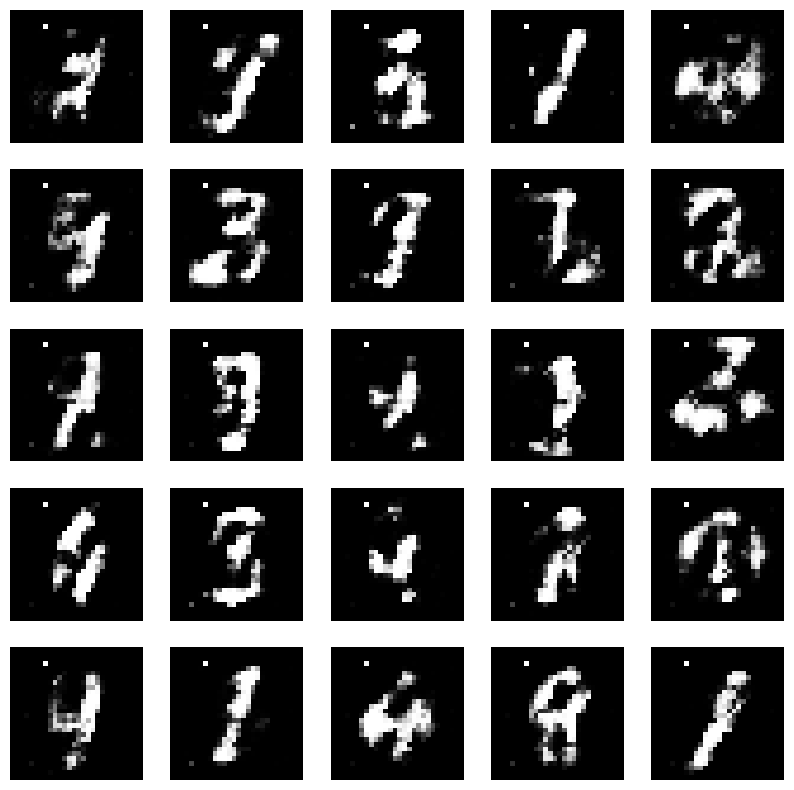

1/1 [==============================] - 0s 16ms/step
13000 [D loss: 0.5930835008621216] [G loss: 1.4862756729125977]
1/1 [==============================] - 0s 16ms/step


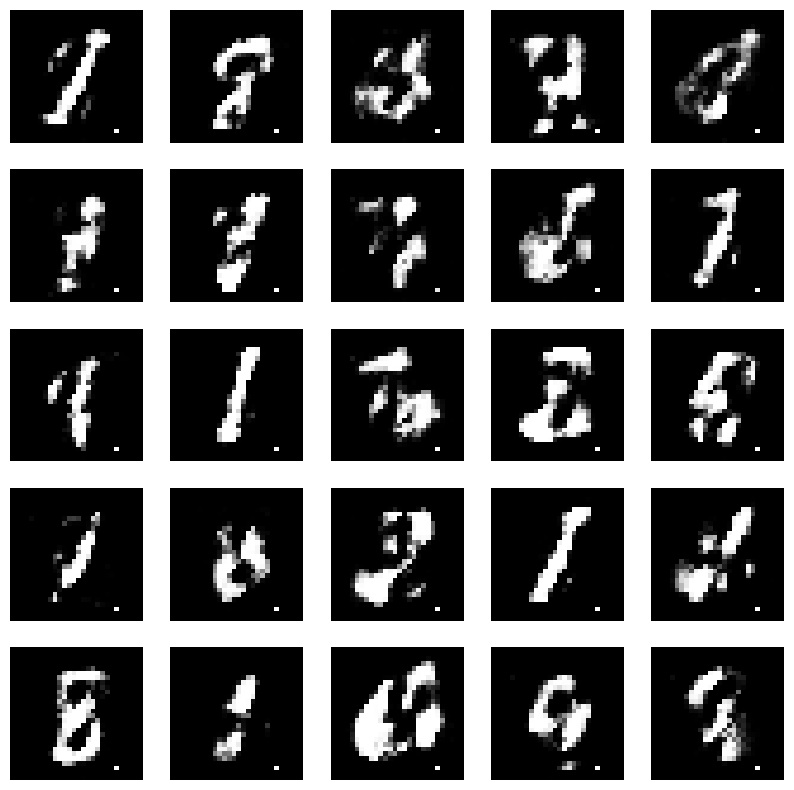

1/1 [==============================] - 0s 29ms/step
14000 [D loss: 0.7563331127166748] [G loss: 1.245572566986084]
1/1 [==============================] - 0s 29ms/step


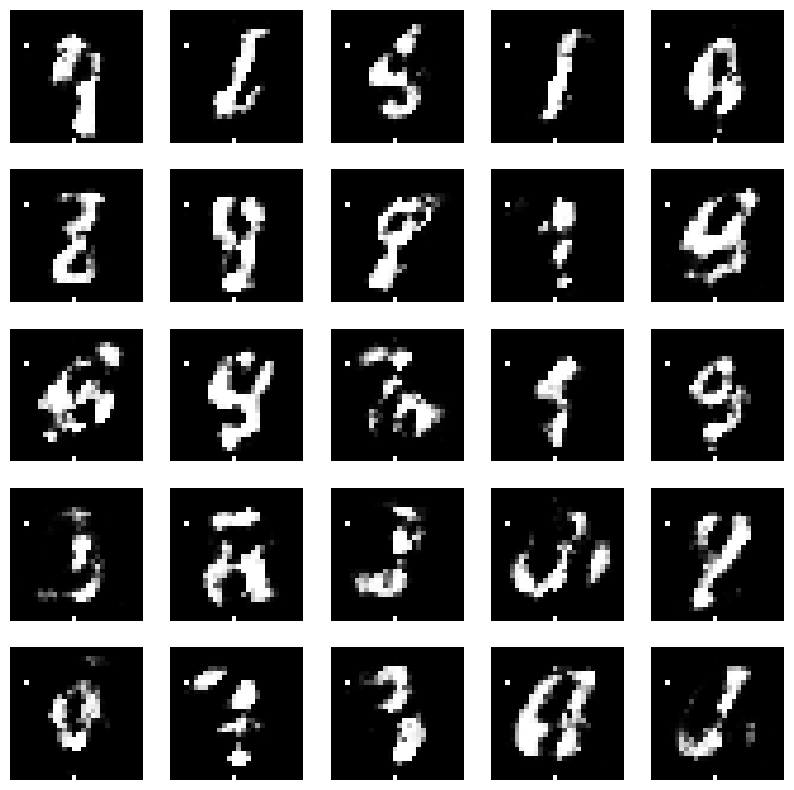

1/1 [==============================] - 0s 18ms/step
15000 [D loss: 0.38263314962387085] [G loss: 1.8213294744491577]
1/1 [==============================] - 0s 26ms/step


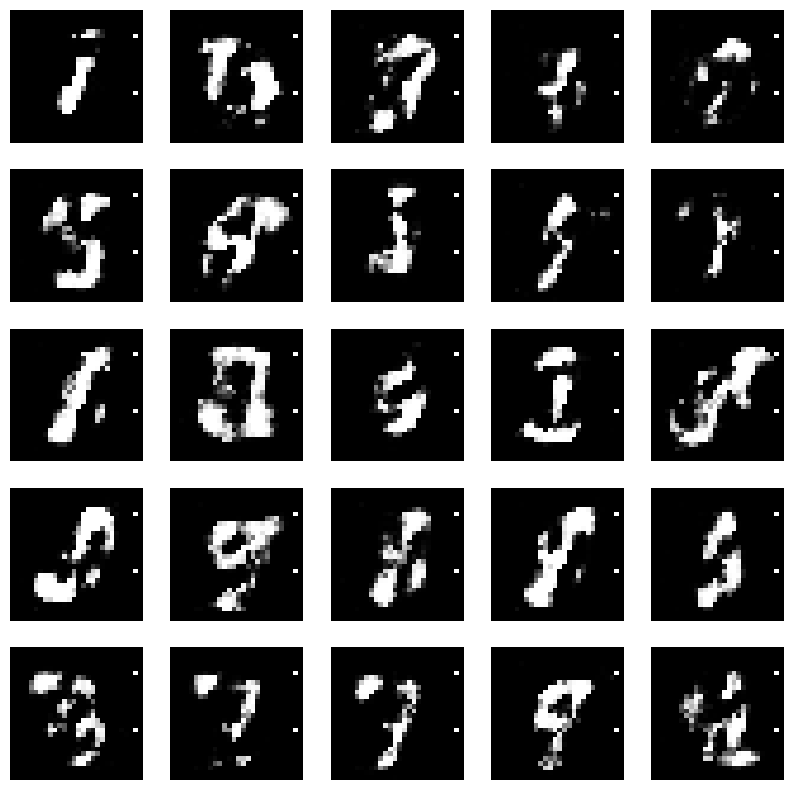

1/1 [==============================] - 0s 29ms/step
16000 [D loss: 0.27618712186813354] [G loss: 1.839173674583435]
1/1 [==============================] - 0s 33ms/step


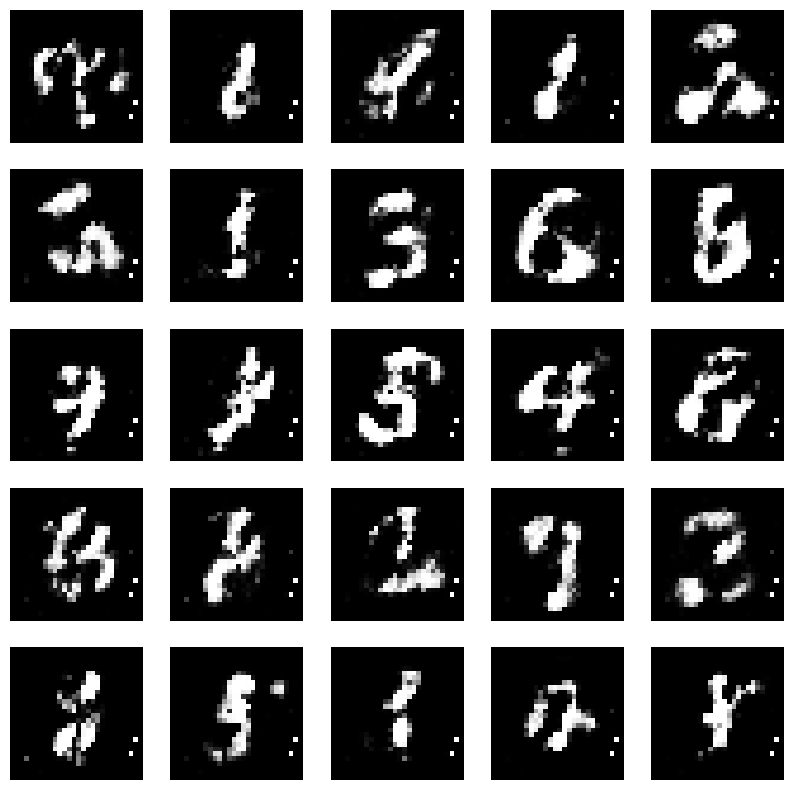

1/1 [==============================] - 0s 18ms/step
17000 [D loss: 0.25265592336654663] [G loss: 2.5454299449920654]
1/1 [==============================] - 0s 25ms/step


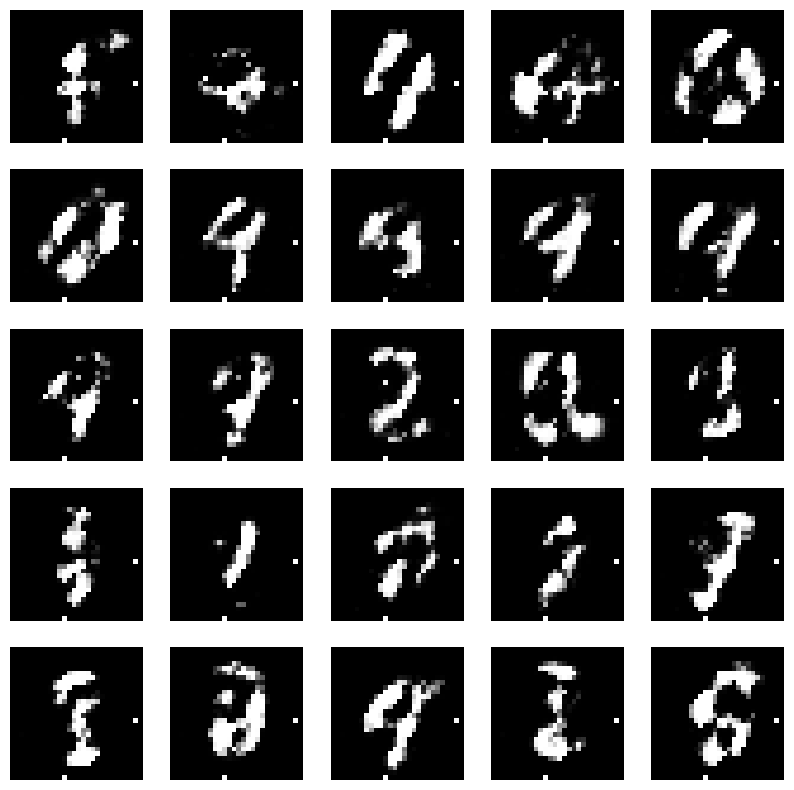

1/1 [==============================] - 0s 20ms/step
18000 [D loss: 0.3195655345916748] [G loss: 2.4700570106506348]
1/1 [==============================] - 0s 26ms/step


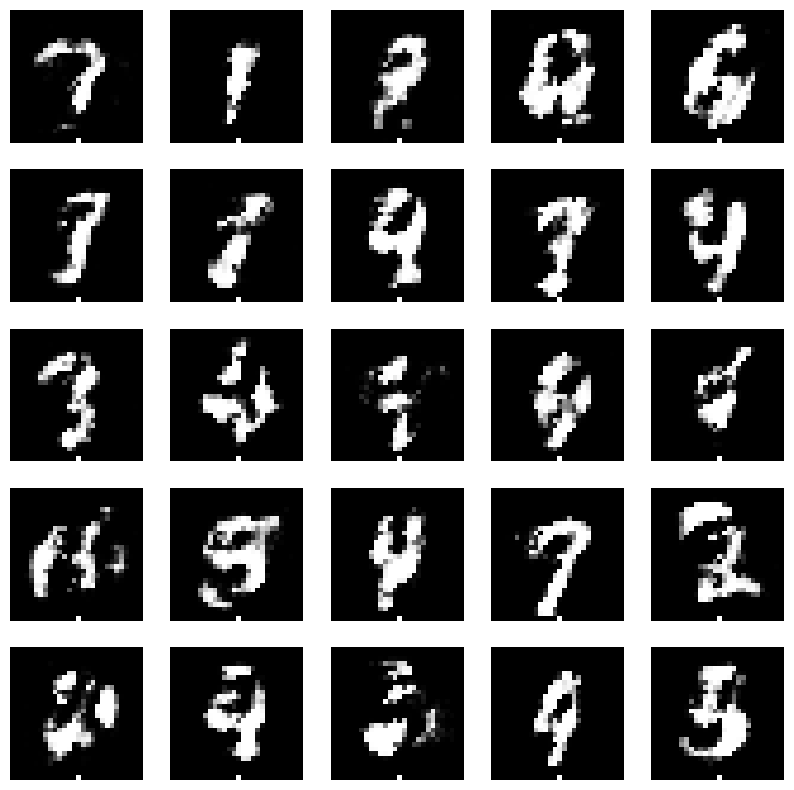

1/1 [==============================] - 0s 20ms/step
19000 [D loss: 0.39450904726982117] [G loss: 1.3080203533172607]
1/1 [==============================] - 0s 28ms/step


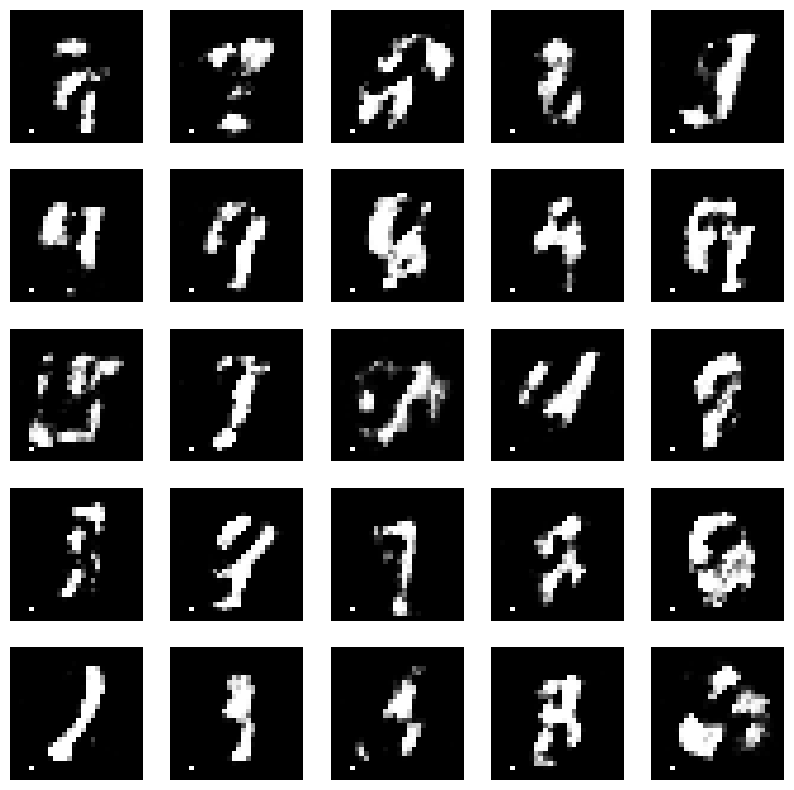

1/1 [==============================] - 0s 15ms/step


In [22]:
train(gan, generator, discriminator, epochs, batch_size, latent_dim)